Task 1:

<h1 align="center">ECE 9022B: Advanced Image Processing and Analysis</h1>
<h3 align="center">Assignment #1</h3>
<h3 align="center">Junyi Zou, [jzou44@uwo.ca](mailto:jzou44@uwo.ca?subject=Assignment #1)</h3>
<h3 align="center">Department of Electronical and Computer Engineering</h3>
<h3 align="center">Western University</h3>
<h3 align="center">Feburary 09, 2018</h3>
<h3 align="center">Submitted to: Elvis C.S. Chen</h3>

Task 2:

In [1]:
import SimpleITK as sitk #Load (import) SimpleITK module into the Python interpretor, rename it as sitk
import matplotlib.pyplot as plt #Load (import) matplotlib.pyplot module and rename it as plt
%matplotlib inline
print(sitk.Version())

SimpleITK Version: 1.0.1 (ITK 4.11)
Compiled: Aug  3 2017 00:01:08



Task 3:

In [28]:
vol = sitk.ReadImage("spine.mha") #Load the CT volumetric file named spine.mha
print(vol.GetSize()) #print size (number of voxels) of the volume
print(vol.GetOrigin()) #print  physical size of the voxel

midZ = vol.GetDepth()//2 #compute the slice number corresponding to the mid-volume in the Depth direction
sitk.Show(vol[:,:,midZ]) #display this 2D mid-Depth image using SimpleITK's built-in Show()

(313, 249, 189)
(125.773, 126.053, 24.8635)


Task 4:

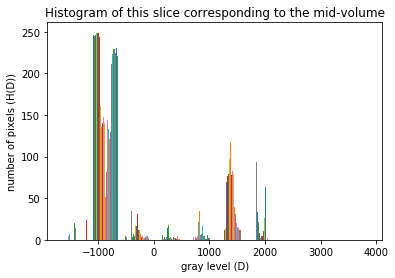

In [3]:
plt.figure()
plt.hist(sitk.GetArrayViewFromImage(vol)[midZ,:,:]) #calculate histogram of the slice
plt.title("Histogram of this slice corresponding to the mid-volume") # add title
plt.xlabel("gray level (D)") # add label for the x-axis
plt.ylabel("number of pixels (H(D))") # add label for the y-axis
plt.show() #display the histogram

Task 5:

In [30]:
thresholdFilter = sitk.BinaryThresholdImageFilter()
#help(thresholdFilter.Execute)
segmentedVolume = thresholdFilter.Execute(vol,0,2200,255,0) #[lower, upper] = [0, 2200]
sitk.Show(segmentedVolume[:,:,midZ])

Task 6:

In [42]:
#Save the segmentation result
sitk.WriteImage(sitk.Cast( segmentedVolume, vol.GetPixelID() ), 'segmented_spine.mha')

Task 7